<a href="https://colab.research.google.com/github/blessondensil294/AV-Hackathon-Interest-Rates/blob/master/AV_Hackathon_Interest_Rate_Category_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# JanataHack: Machine Learning for Banking

Banks offer various kinds of accounts and provide loans based on the requirements. Apart from it, there are other various activities like investments in market and different funds. Overall, the banking sector has a wide impact on the economy directly and indirectly.

There are many banks across the globe that are leveraging machine learning and AI in their daily routine and getting benefits out of it.

For example, top banks in the US like JPMorgan, Wells Fargo, Bank of America, City Bank and US banks are already using machine learning to provide various facilities to customers as well as for risk prevention and detection. Some of the applications include:

1. Customer Support

2. Fraud Detection

3. Risk Modelling

4. Marketing Analytics

5. Customer Segmentation

Have you ever wondered how lenders use various factors such as credit score, annual income, the loan amount approved, tenure, debt-to-income ratio etc. and select your interest rates? 

The process, defined as ‘risk-based pricing’, uses a sophisticated algorithm that leverages different determining factors of a loan applicant. Selection of significant factors will help develop a prediction algorithm which can estimate loan interest rates based on clients’ information. On one hand, knowing the factors will help consumers and borrowers to increase their credit worthiness and place themselves in a better position to negotiate for getting a lower interest rate. On the other hand, this will help lending companies to get an immediate fixed interest rate estimation based on clients information. Here, your goal is to use a training dataset to predict the loan rate category (1 / 2 / 3) that will be assigned to each loan in our test set.

You can use any combination of the features in the dataset to make your loan rate category predictions. Some features will be easier to use than others.


Variable - Definition

Loan_ID - A unique id for the loan.

Loan_Amount_Requested - The listed amount of the loan applied for by the borrower.

Length_Employed - Employment length in years

Home_Owner - The home ownership status provided by the borrower during registration. Values are: Rent, Own, Mortgage, Other.

Annual_Income - The annual income provided by the borrower during registration.

Income_Verified - Indicates if income was verified, not verified, or if the income source was verified

Purpose_Of_Loan - A category provided by the borrower for the loan request. 

Debt_To_Income - A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested loan, divided by the borrower’s self-reported monthly income.

Inquiries_Last_6Mo - The number of inquiries by creditors during the past 6 months.

Months_Since_Deliquency - The number of months since the borrower's last delinquency.

Number_Open_Accounts - The number of open credit lines in the borrower's credit file.

Total_Accounts - The total number of credit lines currently in the borrower's credit file

Gender - Gender

Interest_Rate - Target Variable: Interest Rate category (1/2/3) of the loan application

## Load the Data From Github

In [0]:
import numpy as np
import pandas as pd
df_Test_url = 'https://raw.githubusercontent.com/blessondensil294/AV-Hackathon-Interest-Rates/master/Data/test_fjtUOL8.csv'
df_Train_url = 'https://raw.githubusercontent.com/blessondensil294/AV-Hackathon-Interest-Rates/master/Data/train_fNxu4vz.csv'
df_Train = pd.read_csv(df_Train_url)
df_Test = pd.read_csv(df_Test_url)

## Exploratory Data Analysis

In [2]:
df_Train.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1


In [3]:
df_Train.describe()

,Loan_ID,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Interest_Rate
count,1.643090e+05,1.392070e+05,164309.000000,164309.000000,75930.000000,164309.000000,164309.000000,164309.000000
mean,1.008216e+07,7.333116e+04,17.207189,0.781698,34.229356,11.193818,25.067665,2.158951
std,4.743207e+04,6.037750e+04,7.845083,1.034747,21.761180,4.991813,11.583067,0.738364
min,1.000000e+07,4.000000e+03,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
25%,1.004108e+07,4.500000e+04,11.370000,0.000000,16.000000,8.000000,17.000000,2.000000
50%,1.008216e+07,6.300000e+04,16.840000,0.000000,31.000000,10.000000,23.000000,2.000000
75%,1.012323e+07,8.869750e+04,22.780000,1.000000,50.000000,14.000000,32.000000,3.000000
max,1.016431e+07,7.500000e+06,39.990000,8.000000,180.000000,76.000000,156.000000,3.000000


In [4]:
df_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Loan_ID                  164309 non-null  int64  
 1   Loan_Amount_Requested    164309 non-null  object 
 2   Length_Employed          156938 non-null  object 
 3   Home_Owner               138960 non-null  object 
 4   Annual_Income            139207 non-null  float64
 5   Income_Verified          164309 non-null  object 
 6   Purpose_Of_Loan          164309 non-null  object 
 7   Debt_To_Income           164309 non-null  float64
 8   Inquiries_Last_6Mo       164309 non-null  int64  
 9   Months_Since_Deliquency  75930 non-null   float64
 10  Number_Open_Accounts     164309 non-null  int64  
 11  Total_Accounts           164309 non-null  int64  
 12  Gender                   164309 non-null  object 
 13  Interest_Rate            164309 non-null  int64  
dtypes: f

In [5]:
df_Train.columns

Index(['Loan_ID', 'Loan_Amount_Requested', 'Length_Employed', 'Home_Owner',
       'Annual_Income', 'Income_Verified', 'Purpose_Of_Loan', 'Debt_To_Income',
       'Inquiries_Last_6Mo', 'Months_Since_Deliquency', 'Number_Open_Accounts',
       'Total_Accounts', 'Gender', 'Interest_Rate'],
      dtype='object')

In [6]:
df_Train.shape

(164309, 14)

In [8]:
df_Test.shape

(109541, 13)

In [7]:
df_Train.isnull().sum()

Loan_ID                        0
Loan_Amount_Requested          0
Length_Employed             7371
Home_Owner                 25349
Annual_Income              25102
Income_Verified                0
Purpose_Of_Loan                0
Debt_To_Income                 0
Inquiries_Last_6Mo             0
Months_Since_Deliquency    88379
Number_Open_Accounts           0
Total_Accounts                 0
Gender                         0
Interest_Rate                  0
dtype: int64

## Feature Engineer

Drop the Loan ID Columns since its irrelevant

In [0]:
df_Train = df_Train.drop(['Loan_ID'], axis=1)

### Drop Duplicates

In [10]:
df_Train.shape

(164309, 13)

In [0]:
df_Train.drop_duplicates(keep='first', inplace=True)

### Fill Missing Values

In [0]:
df_Train.isnull().sum()

In [0]:
df_Train['Home_Owner'] = df_Train['Home_Owner'].fillna('None')
df_Test['Home_Owner'] = df_Test['Home_Owner'].fillna('None')
df_Train['Home_Owner'] = df_Train['Home_Owner'].replace(to_replace='Other', value='None')
df_Test['Home_Owner'] = df_Test['Home_Owner'].replace(to_replace='Other', value='None')
df_Train['Length_Employed'] = df_Train['Length_Employed'].ffill()
df_Test['Length_Employed'] = df_Test['Length_Employed'].ffill()
df_Train['Annual_Income'] = df_Train['Annual_Income'].ffill()
df_Test['Annual_Income'] = df_Test['Annual_Income'].ffill()
df_Train['Months_Since_Deliquency'] = df_Train['Months_Since_Deliquency'].ffill()
df_Train['Months_Since_Deliquency'] = df_Train['Months_Since_Deliquency'].bfill()
df_Test['Months_Since_Deliquency'] = df_Test['Months_Since_Deliquency'].ffill()

### Outlier Detection

Annual Income Columns Outlier Detections and Replace

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


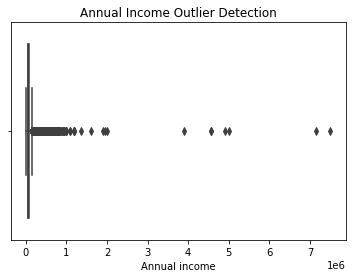

In [12]:
sns.boxplot(x=df_Train['Annual_Income'])
plt.title('Annual Income Outlier Detection')
plt.xlabel('Annual income')
plt.show()

In [13]:
df_Train['Annual_Income'].describe()

count    1.643090e+05
mean     7.325752e+04
std      5.925473e+04
min      4.000000e+03
25%      4.500000e+04
50%      6.300000e+04
75%      8.844500e+04
max      7.500000e+06
Name: Annual_Income, dtype: float64

### Scaling the Columns

In [0]:
from sklearn import preprocessing
mm_scaler = preprocessing.MinMaxScaler()

In [9]:
df_Train.columns

Index(['Loan_Amount_Requested', 'Length_Employed', 'Home_Owner',
       'Annual_Income', 'Income_Verified', 'Purpose_Of_Loan', 'Debt_To_Income',
       'Inquiries_Last_6Mo', 'Months_Since_Deliquency', 'Number_Open_Accounts',
       'Total_Accounts', 'Gender', 'Interest_Rate'],
      dtype='object')

Loan Amount Requested Colmn


In [0]:
df_Train['Loan_Amount_Requested'] = df_Train['Loan_Amount_Requested'].str.replace(',', '').astype(int)
df_Test['Loan_Amount_Requested'] = df_Test['Loan_Amount_Requested'].str.replace(',', '').astype(int)

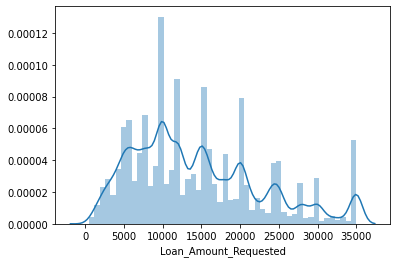

In [11]:
sns.distplot(df_Train['Loan_Amount_Requested'])
plt.show()

In [0]:
df_Train[['Loan_Amount_Requested']] = mm_scaler.fit_transform(df_Train[['Loan_Amount_Requested']])
df_Test[['Loan_Amount_Requested']] = mm_scaler.fit_transform(df_Test[['Loan_Amount_Requested']])

Annual Income Columns

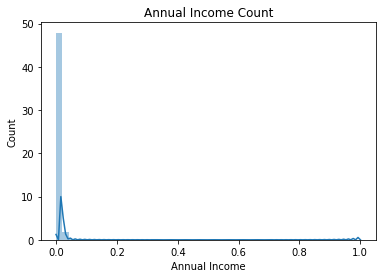

In [50]:
sns.distplot(df_Train['Annual_Income'])
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.title('Annual Income Count')
plt.show()

In [0]:
df_Train[['Annual_Income']] = mm_scaler.fit_transform(df_Train[['Annual_Income']])
df_Test[['Annual_Income']] = mm_scaler.fit_transform(df_Test[['Annual_Income']])